In [2]:
%reload_ext autoreload
%autoreload 2

In [91]:
# Imports
import logregression as lr

import numpy as np
import numpy.ma as ma
import pandas as pd

import librosa as lb

import pylab as plt
import matplotlib.pyplot as mpl

from scipy.special import expit

In [4]:
# Converts the CSV to a dataframe
df = pd.read_csv("speakers_all.csv")
# Creates a boolean array to determine if a file is missing or not
hasFile = np.asarray(df["file_missing?"].to_list())

In [54]:
# Gets the labels from the dataframe and returns them as US and non-US
all = np.asarray(df["country"])
isUS = all == 'usa'
labels = ma.masked_array(isUS, hasFile, fill_value = None)

In [77]:
labelArray = labels.compressed()
labelArray = np.select([labelArray == True, labelArray == False], ["US", "Non-US"])

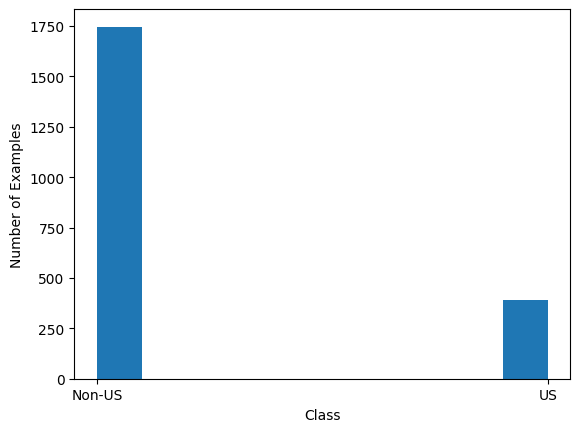

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [92]:
plt.hist(labelArray)
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.show()

In [6]:
# Gets audio data needed to find audio features
# currently takes about 2.5 minutes
data = []
srate = []

allFileNames = np.asarray(df["filename"])
onlyHasFile = ma.masked_array(allFileNames, hasFile, fill_value = None)

for file in onlyHasFile:
    if file != None:
        filename = "recordings/recordings/" + file + ".mp3"
        currData, currSR = lb.load(filename)
        data.append(currData)
        srate.append(currSR)

In [7]:
# Gets the audio features of each file
# currently takes about 2.5 minutes
mfccs = []

for i, j in zip(data, srate):
    mfccs.append(librosa.feature.mfcc(y=i, sr=j))

In [136]:
# Makes both into arrays that can be used to train the log regression
maxLen = max(len(x) for x in mfccs)
reshaped = np.ndarray((len(mfccs), maxLen))

for y in range(len(mfccs)):
    reshaped[y] = np.mean(np.array(mfccs[y]).T, axis=0)

means = np.zeros(len(reshaped))

for i in range(len(reshaped)):
    means[i] = np.mean(reshaped[i])

In [140]:
# Creates a log regression model
clf = lr.main(means.reshape(len(means), 1), labelArray.ravel())

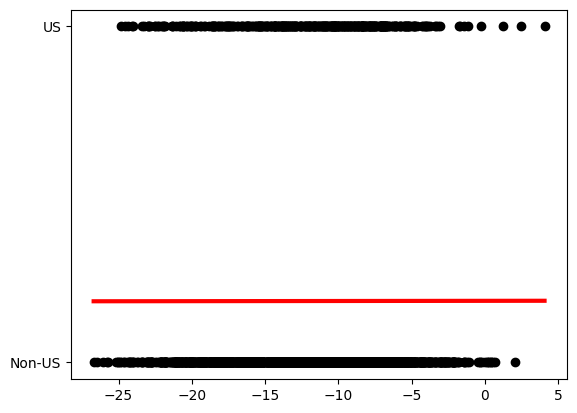

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [148]:
mpl.figure(1, figsize=(4,3))
mpl.clf()

mpl.scatter(means.ravel(), labelArray, label="data", color="black")
test = np.linspace(min(means), max(means), 20)

loss = expit(test * clf.coef_ + clf.intercept_).ravel()
mpl.plot(test, loss, label = "Log Regression", color="red", linewidth=3)

mpl.show()